In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading data

In [5]:
brands = pd.read_csv('/content/drive/MyDrive/Group-Data-Cleaining/data/raw/brands.csv')
orderlines = pd.read_csv('/content/drive/MyDrive/Group-Data-Cleaining/data/raw/orderlines.csv')
orders = pd.read_csv('/content/drive/MyDrive/Group-Data-Cleaining/data/raw/orders.csv')
products = pd.read_csv('/content/drive/MyDrive/Group-Data-Cleaining/data/raw/products.csv')


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df_brands = brands.copy(deep = True)
df_orderlines = orderlines.copy(deep = True)
df_orders = orders.copy(deep = True)
df_products = products.copy(deep = True)


### Preparing and cleaning Data

### 1. df_brands

In [8]:
df_brands.head(5)


,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


In [9]:
df_brands.info()
df_brands.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


,short,long
count,187,187
unique,187,181
top,8MO,Apple
freq,1,2


In [10]:
df_brands.duplicated().sum() # 0
df_brands.isna().sum() # 0


,0
short,0
long,0


### 2. df_orderlines

In [11]:
df_orderlines.head(3)


,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


In [12]:
df_orderlines.dtypes


,0
id,int64
id_order,int64
product_id,int64
product_quantity,int64
sku,object
unit_price,object
date,object


In [13]:
df_orderlines['date'] = pd.to_datetime(df_orderlines['date'], format='mixed').dt.normalize()
print(df_orderlines['date'].head())


0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
Name: date, dtype: datetime64[ns]


In [14]:
df_orderlines.info()
df_orderlines.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


,id,id_order,product_id,product_quantity,date
count,2.939830e+05,293983.000000,293983.0,293983.000000,293983
mean,1.397918e+06,419999.116544,0.0,1.121126,2017-09-18 13:09:13.464656128
min,1.119109e+06,241319.000000,0.0,1.000000,2017-01-01 00:00:00
25%,1.262542e+06,362258.500000,0.0,1.000000,2017-06-06 00:00:00
50%,1.406940e+06,425956.000000,0.0,1.000000,2017-11-13 00:00:00
75%,1.531322e+06,478657.000000,0.0,1.000000,2018-01-02 00:00:00
max,1.650203e+06,527401.000000,0.0,999.000000,2018-03-14 00:00:00
std,1.530096e+05,66344.486479,0.0,3.396569,NaN


In [15]:
df_orderlines.duplicated().sum() # 0
df_orderlines.isna().sum() # 0
df_orderlines.dtypes


,0
id,int64
id_order,int64
product_id,int64
product_quantity,int64
sku,object
unit_price,object
date,datetime64[ns]


In [16]:
df_orderlines.sort_values(by='product_id', ascending=True) # all product_id value is 0
df_orderlines = df_orderlines.drop(columns=['product_id']) # drop it


In [17]:
df_orderlines['unit_price'].str.count("\.").value_counts() # Definition of data type problems


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3996704742.py:1: SyntaxWarning: invalid escape sequence '\.'
  df_orderlines['unit_price'].str.count("\.").value_counts() # Definition of data type problems


,count
unit_price,
1,257814
2,36169


In [18]:
df_orderlines.loc[df_orderlines['unit_price'].str.count('\.') > 1, 'unit_price']


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3636206472.py:1: SyntaxWarning: invalid escape sequence '\.'
  df_orderlines.loc[df_orderlines['unit_price'].str.count('\.') > 1, 'unit_price']


,unit_price
6,1.137.99
11,2.565.99
15,3.278.99
43,2.616.99
59,2.873.99
...,...
293862,2.999.00
293887,3.497.00
293889,3.075.00
293911,1.329.00


In [19]:
count_of_wrong_values = (df_orderlines['unit_price'].str.count('\.') > 1).sum()

percentage_of_wrong_values = (100 * count_of_wrong_values / df_orderlines.shape[0])
percentage_of_wrong_values #12.3% value has mistake with 2 dots in number


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1153224463.py:1: SyntaxWarning: invalid escape sequence '\.'
  count_of_wrong_values = (df_orderlines['unit_price'].str.count('\.') > 1).sum()


np.float64(12.30309235568043)

In [20]:
df_clean = df_orderlines.copy()


#### Hypothesis testing - trying to safe the data with 2 dots

In [21]:
# We making fix from '1.137.99' to '1137.99'
df_clean['unit_price'] = df_clean['unit_price'].str.replace(r'\.(?=\d+\.)', '', regex=True)

# Then changin format to numeric
df_clean['unit_price'] = pd.to_numeric(df_clean['unit_price'], errors='coerce')


In [22]:
unit_price = df_orderlines.loc[df_orderlines['unit_price'].str.count('\.') > 1]
probles_values = unit_price.loc[:,'id_order'].unique()


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-212606594.py:1: SyntaxWarning: invalid escape sequence '\.'
  unit_price = df_orderlines.loc[df_orderlines['unit_price'].str.count('\.') > 1]


In [23]:
len(probles_values)


34642

In [24]:
df_orders.loc[df_orders['order_id'].isin(probles_values), 'total_paid'].sum()


np.float64(89532634.80000001)

In [25]:
merged_df = unit_price.merge(df_products, on='sku')


In [26]:
merged_df = merged_df[['id', 'id_order', 'sku', 'name', 'unit_price', 'price']]


In [27]:
merged_df.sample(5) # first dot is mistake of input the value


,id,id_order,sku,name,unit_price,price
5357,1134371,304520,APP1845,"Apple MacBook Pro 13 ""with Touch Bar 33GHz Cor...",2.358.99,2359
1756,1124433,301934,APP1196,"Apple iMac 21.5 ""Core i5 2.8GHz | 8GB | 1TB",1.426.99,1529
51634,1246940,355380,PAC1033,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 16GB |...",2.873.99,3169
100530,1567709,493600,PAC2119,"Apple iMac 27 ""Core i7 Retina 5K 42GHz | 32GB ...",3.251.59,3799
43560,1227368,345852,PAC1035,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB |...",3.080.99,3649


In [28]:

merged_df['unit_price'] = merged_df['unit_price'].str.replace(r'\.(?=\d+\.)', '', regex=True)
merged_df['unit_price'] = pd.to_numeric(merged_df['unit_price'], errors='raise')


In [29]:
merged_df.sample(5) #clean unit_price


,id,id_order,sku,name,unit_price,price
107128,1598814,505385,APP2294,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",2271.59,2359
63222,1295542,378800,APP2272,"Apple Macbook Pro 13 ""Core i5 Touch Bar 31GHz ...",2810.00,2989
65243,1315995,388496,APP2082,"Apple MacBook Pro 13 ""Core i5 with Touch Bar 3...",1905.59,2005.59
42685,1225570,344941,APP1830,"Apple MacBook Pro 13 ""Core i5 2GHz | RAM 16GB ...",1840.99,1939
44385,1229055,346683,PAC1593,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 16GB...",2673.99,3409


In [30]:
merged_df['price'] = pd.to_numeric(merged_df['price'], errors='coerce') #fix data type


In [31]:
merged_df['unit_price_dif'] = merged_df['price'] - merged_df['unit_price']


In [32]:
merged_df.sample(5)


,id,id_order,sku,name,unit_price,price,unit_price_dif
109297,1612822,511116,APP2256,"Apple MacBook Air 13 ""Core i7 22GHz | 8GB RAM ...",1234.59,1279.0,44.41
105567,1596792,504609,PAC0960,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 16GB...",2447.14,2569.0,121.86
12690,1154200,312785,PAC1238,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB |...",3706.75,4669.0,962.25
19605,1174617,321464,APP1196,"Apple iMac 21.5 ""Core i5 2.8GHz | 8GB | 1TB",1426.99,1529.0,102.01
118664,1645507,525183,APP2272,"Apple Macbook Pro 13 ""Core i5 Touch Bar 31GHz ...",2810.00,2989.0,179.00


In [33]:
# unit_price_dif in %
merged_df['unit_price_dif_%'] = (
    (merged_df['unit_price'] - merged_df['price']) / merged_df['price']
) * 100


In [34]:
merged_df.sample(5)


,id,id_order,sku,name,unit_price,price,unit_price_dif,unit_price_dif_%
60325,1273843,368426,APP2082,"Apple MacBook Pro 13 ""Core i5 with Touch Bar 3...",1899.00,2005.59,106.59,-5.314646
27885,1196634,331422,PAC1065,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 16GB |...",3456.99,3709.00,252.01,-6.794554
44796,1229815,347031,APP1195,"Apple iMac 215 ""Core i5 16GHz | 8GB | 1TB HDD",1189.99,1279.00,89.01,-6.959343
71036,1374360,410674,APP2072,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",1005.59,1105.59,100.00,-9.044944
74918,1412536,427939,APP2486,Apple iPhone 8 Plus 256GB Space Gray,1066.89,1089.00,22.11,-2.030303


In [35]:
merged_df['unit_price_dif_%'].describe()


,unit_price_dif_%
count,117662.000000
mean,-9.052705
std,268.381211
min,-54.348012
25%,-14.156362
50%,-7.004709
75%,-5.001830
max,89279.793296


In [36]:
df_clean['unit_price'].nlargest()


,unit_price
36979,159989.83
38317,15349.00
282442,14725.00
232052,14580.00
232077,14580.00


In [37]:
# the most expensive products afther cleaning
print(df_clean['unit_price'].sort_values(ascending=False).head(10))


36979     159989.83
38317      15349.00
282442     14725.00
241912     14580.00
232077     14580.00
232052     14580.00
248338     14580.00
255454     14580.00
234834     14580.00
255123     14580.00
Name: unit_price, dtype: float64


In [38]:
# avg price
print(f"Avg price {df_clean['unit_price'].mean()}")


Avg price 409.8551916607422


In [39]:
# total order price
df_clean['total_price'] = df_clean['product_quantity'] * df_clean['unit_price']

# grand total price
grand_total = df_clean['total_price'].sum()
print(f"Total price: {grand_total:.2f}")


Total price: 128776222.03


In [40]:

dirty_indices = df_orderlines.loc[df_orderlines['unit_price'].str.count('\.') > 1].index
saved_revenue = df_clean.loc[dirty_indices, 'total_price'].sum()

total_revenue = df_clean['total_price'].sum()

print(f"Revenue in rescued data: {saved_revenue:,.2f} €")
print(f"Total revenue of the entire database {total_revenue:,.2f} €")
print(f"Share of rescued revenue: {(saved_revenue / total_revenue) * 100:.2f}%")


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3471569578.py:1: SyntaxWarning: invalid escape sequence '\.'
  dirty_indices = df_orderlines.loc[df_orderlines['unit_price'].str.count('\.') > 1].index


Revenue in rescued data: 83,689,221.59 €
Total revenue of the entire database 128,776,222.03 €
Share of rescued revenue: 64.99%


In [41]:
df_clean_orderlines = df_clean.copy()


In [42]:
df_clean_orderlines.sample(5)


,id,id_order,product_quantity,sku,unit_price,date,total_price
182319,1469225,452349,1,APP1216,130.00,2017-11-30,130.00
286634,1639647,523004,1,APP2489,1099.00,2018-03-07,1099.00
118645,1355735,401684,1,AP20321,570.33,2017-09-19,570.33
176146,1461489,449699,1,APP2324,3028.59,2017-11-27,3028.59
229210,1545992,485152,1,WDT0370,138.48,2018-01-08,138.48


In [43]:
df_clean_orderlines.isna().sum()


,0
id,0
id_order,0
product_quantity,0
sku,0
unit_price,0
date,0
total_price,0


In [44]:
df_clean_orderlines['unit_price'].nlargest()


,unit_price
36979,159989.83
38317,15349.00
282442,14725.00
232052,14580.00
232077,14580.00


### 3. df_orders

In [45]:
df_orders.head(5)


,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [46]:
df_orders.dtypes


,0
order_id,int64
created_date,object
total_paid,float64
state,object


In [47]:
df_orders['created_date'] = pd.to_datetime(df_orders['created_date'], format='mixed').dt.normalize()
print(df_orders['created_date'].head())


0   2017-01-02
1   2017-11-06
2   2017-12-31
3   2017-02-16
4   2017-11-24
Name: created_date, dtype: datetime64[ns]


In [48]:
df_orders.info()
df_orders.describe()

# total paid miss value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


,order_id,created_date,total_paid
count,226909.000000,226909,226904.000000
mean,413296.482480,2017-09-06 00:37:09.023970048,569.225818
min,241319.000000,2017-01-01 00:00:00,0.000000
25%,356263.000000,2017-05-17 00:00:00,34.190000
50%,413040.000000,2017-10-16 00:00:00,112.990000
75%,470553.000000,2017-12-24 00:00:00,525.980000
max,527401.000000,2018-03-14 00:00:00,214747.530000
std,65919.250331,NaN,1761.778002


In [49]:
#df_orders.duplicated().sum() # 0
df_orders.isna().sum() # 5


,0
order_id,0
created_date,0
total_paid,5
state,0


In [50]:
df_orders[df_orders['total_paid'].isna()] # 5 NaN values (with Pending state)


,order_id,created_date,total_paid,state
127701,427314,2017-11-20,NaN,Pending
132013,431655,2017-11-22,NaN,Pending
147316,447411,2017-11-27,NaN,Pending
148833,448966,2017-11-27,NaN,Pending
149434,449596,2017-11-27,NaN,Pending


In [51]:
df_orders['state'].value_counts() # Pending - 14.3k but NaN values only 5

# probably NaN values dont related with state column
# NaN values was old created_date so probably its system mistake


,count
state,
Shopping Basket,117809
Completed,46605
Place Order,40883
Pending,14379
Cancelled,7233


In [52]:
df_orders = df_orders.dropna(subset=['total_paid'])
print(df_orders['total_paid'].isna().sum())


0


In [53]:
df_orders[df_orders['total_paid'].isna()]


,order_id,created_date,total_paid,state


In [54]:
df_orders.sample(5)


,order_id,created_date,total_paid,state
35046,334530,2017-03-13,165.92,Pending
56527,356063,2017-05-15,15.99,Shopping Basket
74407,373953,2017-07-07,12.98,Place Order
29427,328909,2017-02-25,99.99,Place Order
47743,347236,2017-04-18,359.98,Shopping Basket


In [55]:
df_orders.groupby('state')['total_paid'].sum().sort_values(ascending=False)


,total_paid
state,
Shopping Basket,85912559.93
Place Order,17087858.32
Completed,15910079.24
Cancelled,5545816.86
Pending,4703300.72


In [56]:
df_orders.loc[df_orders['state'] == 'Shopping Basket', 'total_paid'].sort_values(ascending = False)


,total_paid
96028,214747.53
2478,214746.63
183927,214714.31
61659,214642.47
40557,214517.58
...,...
177345,0.00
177330,0.00
177320,0.00
177309,0.00


---
- 5 NaN values in total_paid was delated

In [57]:
df_orders.duplicated().sum()


np.int64(0)

### 4. df_products

In [58]:
df_products.sample(10)


,sku,name,desc,price,promo_price,in_stock,type
16220,PAC2074,"Apple iMac 27 ""Core i5 Retina 5K 34GHz | 16GB ...",IMac desktop computer 27 inch Retina 5K RAM 16...,2579,23.720.045,0,"5,74E+15"
7373,PAC1617,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 16GB R...",IMac desktop computer 27 inch Retina 5K 4GHz C...,4609,35.749.898,0,"5,74E+15"
14267,APP1912,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29GHz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,4879,46.415.842,0,2158
3639,APP1379,"Apple iMac 27 ""Core i5 3.3GHz Retina 5K | 8GB ...",IMac desktop computer 27 inch 8GB RAM 512GB Re...,2869,27.315.847,0,"5,74E+15"
1018,GTE0027,G-Tech G-RAID mini USB 3.0 1TB RAID Drive,portable disk RAID G-Technology FireWire 800 a...,294,2.289.901,0,11935397
12688,OTT0133,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,199.904,0,11865403
13126,LAC0197,LaCie Porsche Design Mobile Hard Drive Disk US...,Aluminum External Hard Drive 1TB USB3.0 connec...,84.99,669.941,0,11935397
992,ACM0009,"Acme Skinny Sleeve Case MacBook Air 11 ""Black",Neoprene sleeve for MacBook Air 11 inch.,34.95,239.895,1,13835403
103,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
13664,DLL0047,Dell E-series E2417H 24 FHD IPS DP VGA,Monitor 24 inch FHD with high vision support w...,196.6,165.989,0,1296


In [59]:
df_products.dtypes


,0
sku,object
name,object
desc,object
price,object
promo_price,object
in_stock,int64
type,object


In [60]:
df_products.info()
df_products.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


,in_stock
count,19326.000000
mean,0.109593
std,0.312390
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


---------

In [61]:
df_products.duplicated().sum()


np.int64(8746)

In [62]:
df_products.isna().sum()


,0
sku,0
name,0
desc,7
price,46
promo_price,0
in_stock,0
type,50


### Pre-conclusions of row df_products:

- duplicate - 8746 values (of total value 19326)
- miss values - price(46), type(50), desc(7)
- types error - price, promo_price

In [63]:
df_products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [64]:
df_products = df_products.drop_duplicates()


In [65]:
df_products.duplicated().sum()


np.int64(0)

In [66]:
df_products.loc[df_products['desc'].isnull()]


,sku,name,desc,price,promo_price,in_stock,type
16126,WDT0211-A,"Open - Purple 2TB WD 35 ""PC Security Mac hard ...",NaN,107,814.659,0,1298
16128,APP1622-A,Open - Apple Smart Keyboard Pro Keyboard Folio...,NaN,1.568.206,1.568.206,0,1298
17843,PAC2334,Synology DS718 + NAS Server | 10GB RAM,NaN,566.35,5.659.896,0,12175397
18152,KAN0034-A,Open - Kanex USB-C Gigabit Ethernet Adapter Ma...,NaN,29.99,237.925,0,1298
18490,HTE0025,Hyper Pearl 1600mAh battery Mini USB Mirror an...,NaN,24.99,22.99,1,1515
18612,OTT0200,OtterBox External Battery Power Pack 20000 mAHr,NaN,79.99,56.99,1,1515
18690,HOW0001-A,Open - Honeywell thermostat Lyric zonificador ...,NaN,199.99,1.441.174,0,11905404


In [67]:
df_products['desc'] = df_products['name']


In [68]:
df_products['price'] = pd.to_numeric(df_products['price'], errors='coerce')
df_products['promo_price'] = pd.to_numeric(df_products['promo_price'], errors='coerce')


In [69]:
df_products.info()
df_products.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10580 non-null  object 
 1   name         10580 non-null  object 
 2   desc         10580 non-null  object 
 3   price        10157 non-null  float64
 4   promo_price  5983 non-null   float64
 5   in_stock     10580 non-null  int64  
 6   type         10530 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 661.2+ KB


,price,promo_price,in_stock
count,10157.000000,5983.000000,10580.000000
mean,663.124629,363.244268,0.194140
std,1355.237789,336.827855,0.395556
min,2.990000,2.310000,0.000000
25%,44.900000,149.895000,0.000000
50%,119.000000,299.899000,0.000000
75%,649.891000,499.899000,0.000000
max,15339.000000,9841.990000,1.000000


In [70]:
pd.set_option('display.float.format', lambda x: '%.2f' % x)


In [71]:
brands_clean = df_brands.copy(deep = True)
orderlines_clean = df_clean_orderlines.copy(deep = True)
orders_clean = df_orders.copy(deep = True)
products_clean = df_products.copy(deep = True)


products_clean.isna().sum()

In [72]:
products_clean.loc[products_clean['promo_price'].isna()]


,sku,name,desc,price,promo_price,in_stock,type
50,APP0367,Apple Mini DisplayPort to DVI Adapter Mac dual...,Apple Mini DisplayPort to DVI Adapter Mac dual...,119.00,NaN,0,1325
51,APP0344,"Apple Thunderbolt Display 27 ""Monitor Mac","Apple Thunderbolt Display 27 ""Monitor Mac",1149.00,NaN,0,1296
66,MAK0008,Maclocks theft case iPad 2 3 and 4 black with ...,Maclocks theft case iPad 2 3 and 4 black with ...,120.00,NaN,0,12635403
67,MAK0007,Maclocks theft case iPad 2 3 and 4 transparent...,Maclocks theft case iPad 2 3 and 4 transparent...,120.00,NaN,0,12635403
97,MAK0014,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,164.99,NaN,0,1216
...,...,...,...,...,...,...,...
19300,REP0412,Rear Camera Repair iPhone 7 Plus,Rear Camera Repair iPhone 7 Plus,119.99,NaN,0,"1,44E+11"
19317,REP0403,iPad LCD screen repair,iPad LCD screen repair,159.99,NaN,0,"1,44E+11"
19318,REP0402,iPad touch screen repair,iPad touch screen repair,139.99,NaN,0,"1,44E+11"
19319,KNO0032,"Knomo MacBook Pro Beauchamp Backpack 14 ""Black","Knomo MacBook Pro Beauchamp Backpack 14 ""Black",179.00,NaN,1,1392


In [73]:
# products_clean.loc[products_clean['price'].isna()]
products_clean.dropna(subset=['price'], inplace=True)
products_clean.dropna(subset=['type'], inplace=True)


In [74]:
products_clean.info()
products_clean.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 10110 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10110 non-null  object 
 1   name         10110 non-null  object 
 2   desc         10110 non-null  object 
 3   price        10110 non-null  float64
 4   promo_price  5824 non-null   float64
 5   in_stock     10110 non-null  int64  
 6   type         10110 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 631.9+ KB


,0
sku,0
name,0
desc,0
price,0
promo_price,4286
in_stock,0
type,0


In [75]:
# we have 4286 Nan values. Should we drop it or recovery?
# I decided try to count the difference between avg price and promo price.
products_clean.loc[products_clean['promo_price'].isna()]


,sku,name,desc,price,promo_price,in_stock,type
50,APP0367,Apple Mini DisplayPort to DVI Adapter Mac dual...,Apple Mini DisplayPort to DVI Adapter Mac dual...,119.00,NaN,0,1325
51,APP0344,"Apple Thunderbolt Display 27 ""Monitor Mac","Apple Thunderbolt Display 27 ""Monitor Mac",1149.00,NaN,0,1296
66,MAK0008,Maclocks theft case iPad 2 3 and 4 black with ...,Maclocks theft case iPad 2 3 and 4 black with ...,120.00,NaN,0,12635403
67,MAK0007,Maclocks theft case iPad 2 3 and 4 transparent...,Maclocks theft case iPad 2 3 and 4 transparent...,120.00,NaN,0,12635403
97,MAK0014,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,164.99,NaN,0,1216
...,...,...,...,...,...,...,...
19300,REP0412,Rear Camera Repair iPhone 7 Plus,Rear Camera Repair iPhone 7 Plus,119.99,NaN,0,"1,44E+11"
19317,REP0403,iPad LCD screen repair,iPad LCD screen repair,159.99,NaN,0,"1,44E+11"
19318,REP0402,iPad touch screen repair,iPad touch screen repair,139.99,NaN,0,"1,44E+11"
19319,KNO0032,"Knomo MacBook Pro Beauchamp Backpack 14 ""Black","Knomo MacBook Pro Beauchamp Backpack 14 ""Black",179.00,NaN,1,1392


In [76]:
price_m = products_clean.groupby('name')['price'].mean()
promo_pm = products_clean.groupby('name')['promo_price'].mean()


In [77]:
products_valid = products_clean.loc[products_clean['promo_price'] <= products_clean['price']]

price_m = products_valid.groupby('name')['price'].mean()
promo_pm = products_valid.groupby('name')['promo_price'].mean()

diff_by_name = (price_m - promo_pm)

diff_by_name.mean()


np.float64(51.455960831334934)

In [78]:

products_clean.loc[products_clean['promo_price'] > products_clean['price'], 'promo_price'] = np.nan


In [79]:
# avg discount %

discount_percent = 100 - (promo_pm / price_m * 100)
discount_percent.mean()


np.float64(18.54815801417053)

In [80]:
products_clean.drop(columns='promo_price', inplace= True)


In [81]:
#products_clean.drop(columns='price_diff', inplace= True)


In [82]:
products_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10110 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       10110 non-null  object 
 1   name      10110 non-null  object 
 2   desc      10110 non-null  object 
 3   price     10110 non-null  float64
 4   in_stock  10110 non-null  int64  
 5   type      10110 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 552.9+ KB


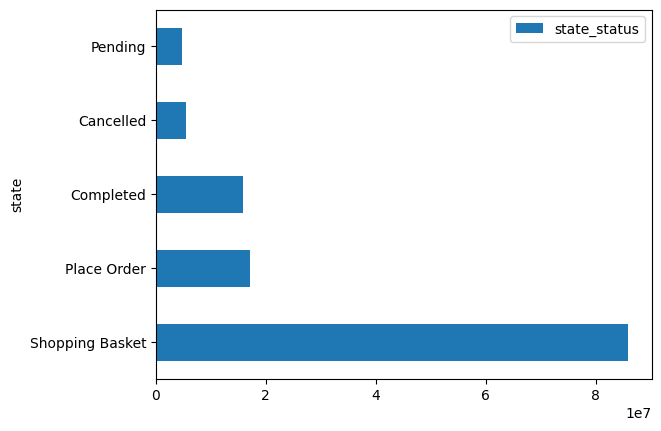

In [83]:
order_by_state = (
    orders_clean
    .groupby('state')
    .agg(
        state_status = ('total_paid', 'sum')
    )
    .sort_values('state_status',ascending = False)
)


order_by_state.plot.barh();


In [84]:
orders_completed = orders_clean.loc[orders_clean['state'] == 'Completed']


In [85]:
orders_completed.shape, orders_completed.order_id.nunique()


((46605, 4), 46605)

In [86]:
orderlines_clean.id_order.nunique()


204855

In [87]:
orders_clean.order_id.nunique()


226904

In [88]:
order_set = set(orders_completed['order_id'])


In [89]:
orderlines_set = set(orderlines_clean['id_order'].unique())


In [90]:
common_order_ids = order_set.intersection(orderlines_set)


In [91]:
orders_clean = orders_clean.loc[orders_clean['order_id'].isin(common_order_ids)]


In [92]:
orderlines_clean = orderlines_clean.loc[orderlines_clean['id_order'].isin(common_order_ids), :]


In [93]:
orders_clean['order_id'].nunique(), orderlines_clean['id_order'].nunique()


(46560, 46560)

In [94]:
orderlines_clean['id_order'].sort_values().unique() == orders_clean['order_id'].sort_values()


,order_id
1,True
2,True
3,True
5,True
6,True
...,...
226549,True
226577,True
226581,True
226603,True


### Looking for a outlines

#### Looking for insights

In [95]:
products_clean.info()
products_clean.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 10110 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       10110 non-null  object 
 1   name      10110 non-null  object 
 2   desc      10110 non-null  object 
 3   price     10110 non-null  float64
 4   in_stock  10110 non-null  int64  
 5   type      10110 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 552.9+ KB


,price,in_stock
count,10110.00,10110.00
mean,662.88,0.20
std,1358.05,0.40
min,2.99,0.00
25%,44.90,0.00
50%,118.99,0.00
75%,640.72,0.00
max,15339.00,1.00


In [96]:
orderlines_clean.info()
orderlines_clean.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 62103 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                62103 non-null  int64         
 1   id_order          62103 non-null  int64         
 2   product_quantity  62103 non-null  int64         
 3   sku               62103 non-null  object        
 4   unit_price        62103 non-null  float64       
 5   date              62103 non-null  datetime64[ns]
 6   total_price       62103 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.8+ MB


,id,id_order,product_quantity,unit_price,date,total_price
count,62103.00,62103.00,62103.00,62103.00,62103,62103.00
mean,1385896.03,414476.58,1.12,239.90,2017-09-11 06:17:26.558137088,252.96
min,1119116.00,241423.00,1.00,0.00,2017-01-01 00:00:00,0.00
25%,1265837.00,362802.50,1.00,28.99,2017-06-11 00:00:00,29.99
50%,1389566.00,417225.00,1.00,69.99,2017-10-26 00:00:00,75.99
75%,1513594.50,470008.50,1.00,185.79,2017-12-24 00:00:00,206.99
max,1649593.00,527112.00,72.00,8287.80,2018-03-14 00:00:00,13387.77
std,150516.13,65428.74,0.78,501.95,NaN,524.95


In [97]:
orders_clean.info()
orders_clean.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 46560 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46560 non-null  int64         
 1   created_date  46560 non-null  datetime64[ns]
 2   total_paid    46560 non-null  float64       
 3   state         46560 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


,order_id,created_date,total_paid
count,46560.00,46560,46560.00
mean,415071.69,2017-09-11 22:04:38.350515456,341.65
min,241423.00,2017-01-01 00:00:00,0.00
25%,362810.50,2017-06-09 00:00:00,50.98
50%,417949.00,2017-10-28 00:00:00,113.62
75%,471015.00,2017-12-26 00:00:00,333.99
max,527112.00,2018-03-14 00:00:00,13387.78
std,65791.87,NaN,625.76


#### products_clean - outlines

<Axes: >

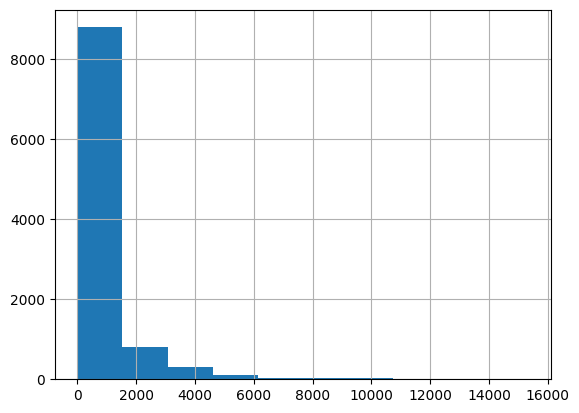

In [98]:
products_clean['price'].hist()


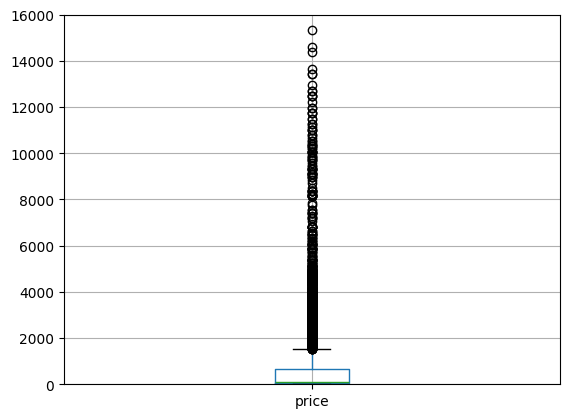

In [99]:
ax = products_clean.boxplot('price');
ax.set_ylim(0, 16000)
plt.show()


In [100]:
# products_clean has no outlines, its premium products of apple
products_clean.loc[products_clean['price'] > 10000].sort_values(by = 'price', ascending=False).head()


,sku,name,desc,price,in_stock,type
18429,APP2660,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...","Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...",15339.00,0,118692158
18465,APP2696,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...","Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...",14619.00,0,118692158
18428,APP2659,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...","Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...",14379.00,0,118692158
18464,APP2695,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...","Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...",13659.00,0,118692158
18425,APP2656,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...","Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...",13419.00,0,118692158


#### orderlines_clean - outlines

In [101]:
orderlines_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 62103 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                62103 non-null  int64         
 1   id_order          62103 non-null  int64         
 2   product_quantity  62103 non-null  int64         
 3   sku               62103 non-null  object        
 4   unit_price        62103 non-null  float64       
 5   date              62103 non-null  datetime64[ns]
 6   total_price       62103 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.8+ MB


<Axes: >

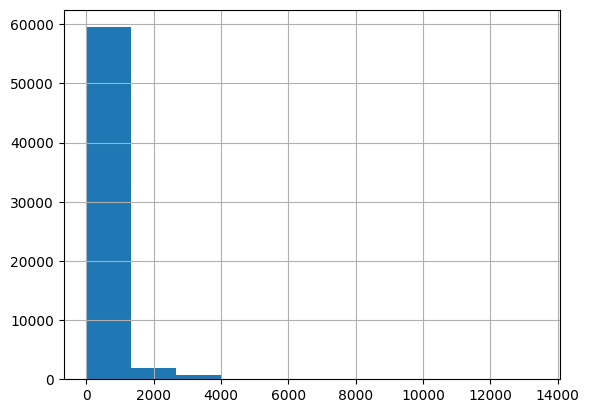

In [102]:
orderlines_clean['total_price'].hist()


In [103]:
orderlines_clean['total_price'].nlargest()


,total_price
174052,13387.77
170927,8287.80
155065,7955.18
46278,7952.97
122992,7335.59


In [104]:
orderlines_clean.loc[orderlines_clean['unit_price'] > 8000, :]


,id,id_order,product_quantity,sku,unit_price,date,total_price
170927,1451975,445507,1,LAC0223,8287.80,2017-11-26,8287.80


In [105]:
#real price, data is ok
products_clean.loc[products_clean['sku'] == 'LAC0223', :].head(5)


,sku,name,desc,price,in_stock,type
14477,LAC0223,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,9799.00,0,11935397


In [106]:
bad_skus = products_clean.loc[products_clean['type'] == '21632158', 'sku']

# We leave only those lines whose SKUs are NOT included in the list of bad ones
orderlines_clean = orderlines_clean.loc[~orderlines_clean['sku'].isin(bad_skus)].copy()


In [107]:
# 1. Find the order IDs of the orders that contained the bad SKUs (before they were removed from orderlines)
# Or use the original df_orderlines before filtering:
bad_order_ids = df_orderlines.loc[df_orderlines['sku'].isin(bad_skus), 'id_order'].unique()

# 2. Delete these orders from the main orders table.
orders_clean = orders_clean.loc[~orders_clean['order_id'].isin(bad_order_ids)].copy()


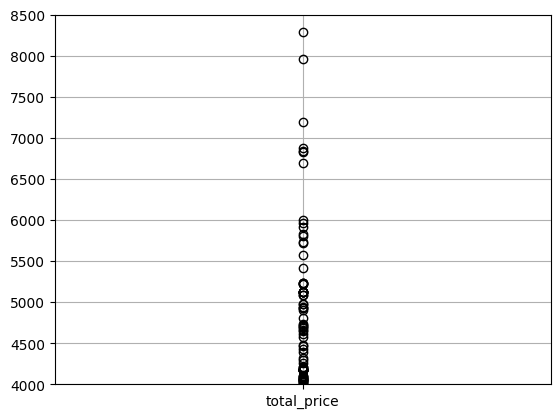

In [108]:

ax = orderlines_clean.boxplot('total_price');
ax.set_ylim(4000, +8500)
plt.show()


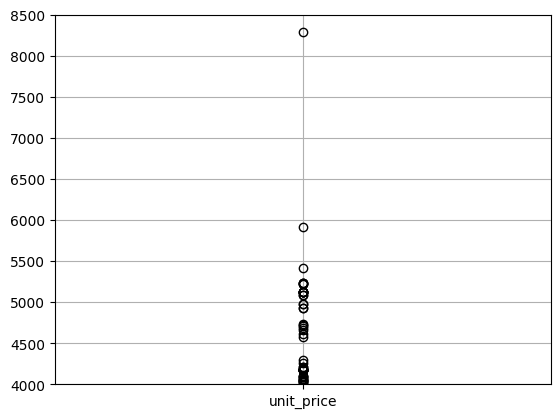

In [109]:

ax = orderlines_clean.boxplot('unit_price');
ax.set_ylim(4000, +8500)
plt.show()


#### orders_clean - outlines

<Axes: >

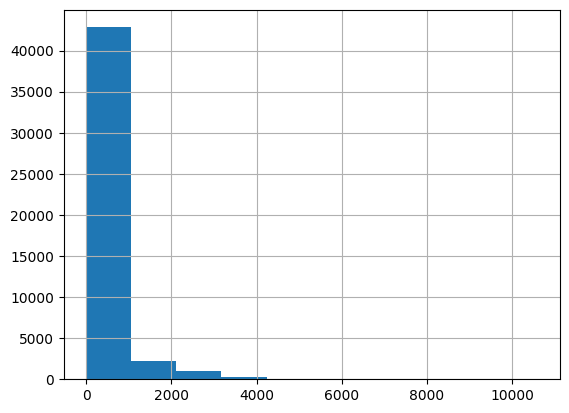

In [110]:
orders_clean['total_paid'].hist()


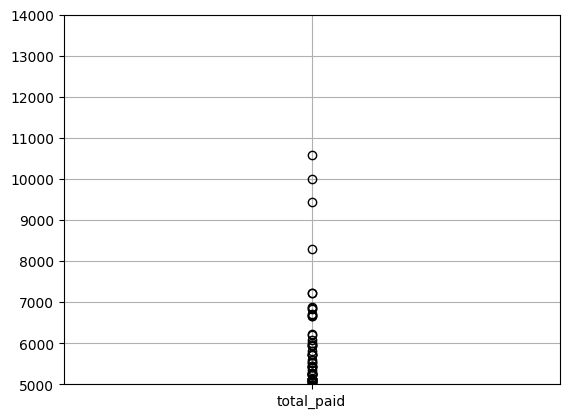

In [111]:
# Удалить дороже 8к?
ax = orders_clean.boxplot('total_paid');
ax.set_ylim(5000, +14000)
plt.show()


In [112]:
orders_clean.loc[orders_clean['total_paid'] > 8000].sort_values(by = 'total_paid', ascending=False)


,order_id,created_date,total_paid,state
95399,394981,2017-08-31,10586.97,Completed
40247,339735,2017-03-27,9987.76,Completed
34178,333662,2017-04-12,9423.90,Completed
145412,445507,2017-11-26,8287.80,Completed


In [113]:
orders_clean.describe()


,order_id,created_date,total_paid
count,46534.00,46534,46534.00
mean,415066.92,2017-09-11 21:39:58.401168896,338.96
min,241423.00,2017-01-01 00:00:00,0.00
25%,362797.00,2017-06-09 00:00:00,50.98
50%,417945.00,2017-10-28 00:00:00,113.34
75%,471031.00,2017-12-26 00:00:00,333.07
max,527112.00,2018-03-14 00:00:00,10586.97
std,65800.70,NaN,613.40


In [114]:
# order_clean has no outlines, its premium products
orderlines_clean.loc[orderlines_clean['id_order'].isin([448053, 394981, 339735, 333662, 433435, 445507]), :].sort_values(by = 'total_price', ascending = False)


,id,id_order,product_quantity,sku,unit_price,date,total_price
170927,1451975,445507,1,LAC0223,8287.80,2017-11-26,8287.80
46278,1214691,339735,3,PAC0968,2650.99,2017-03-27,7952.97
110814,1329583,394981,3,APP2365,1905.59,2017-08-31,5716.77
52424,1225689,333662,1,PAC1628,4049.99,2017-04-10,4049.99
52419,1225677,333662,1,APP1876,3836.99,2017-04-10,3836.99
110818,1329590,394981,1,APP2264,2713.59,2017-08-31,2713.59
110806,1329562,394981,1,PAC2136,2156.59,2017-08-31,2156.59
46289,1214703,339735,1,APP1209,1112.99,2017-03-27,1112.99
155066,1425163,433435,4,DLL0012,203.00,2017-11-23,812.00
52425,1225691,333662,1,BOS0037,599.00,2017-04-10,599.00


## Analysing

### Category of products creations

In [115]:
product_category_df = products_clean.copy()


In [116]:
# We have a product type, so we'll segment by that data. In other cases, we'll use the regex approach.
product_category_df.groupby('type').count().nlargest(20, 'sku')


,sku,name,desc,price,in_stock
type,,,,,
11865403,1061,1061,1061,1061,1061
12175397,941,941,941,941,941
1298,820,820,820,820,820
11935397,565,565,565,565,565
11905404,464,464,464,464,464
1282,373,373,373,373,373
12635403,367,367,367,367,367
13835403,269,269,269,269,269
"5,74E+15",247,247,247,247,247


In [117]:
product_category_df['category'] = ''
product_category_df


,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Silver Rain Design mStand Support,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,Apple Mac Keyboard Keypad Spanish,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,Mighty Mouse Apple Mouse for Mac,59.00,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,Apple Dock to USB Cable iPhone and iPod white,25.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,34.99,1,1364,
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,Belkin Travel Support Apple Watch Black,29.99,1,12282,
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black","Enroute Thule 14L Backpack MacBook 13 ""Black",69.95,1,1392,
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue","Enroute Thule 14L Backpack MacBook 13 ""Blue",69.95,1,1392,
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red","Enroute Thule 14L Backpack MacBook 13 ""Red",69.95,0,1392,


In [118]:
category_map = {
    11865403: 'smartphones accessories',
    12175397: 'desktop components',
    11935397: 'desktop components',
    11905404: 'lifestyle and smart home',
    1282: 'desktop',
    12635403: 'tablеt accessories',
    13835403: 'desktop components',
    #5,74E+15: 'desktop', - we segment with a separate request
    1364: 'desktop components',
    12585395: 'desktop components',
    1296: 'desktop',
    1325: 'desktop components',
    5384: 'accessories',
    1433: 'desktop components',
    12215397: 'desktop components',
    5398: 'accessories',
    #1,44E+11: 'smartphones accessories', - we segment with a separate request
    57445397: 'desktop components',
    #1,02E+12: 'desktop' - we segment with a separate request
}


In [119]:
product_category_df = product_category_df.replace('', np.nan)
product_category_df['category'] = product_category_df['category'].fillna('Other')

for k, v in category_map.items():
    product_category_df.loc[product_category_df['type'] == k, 'category'] = v


/tmp/ipython-input-3776695418.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  product_category_df = product_category_df.replace('', np.nan)


In [120]:
# cleaning segmentation
product_category_df.loc[(product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False)), 'category'] = 'smartphone'
product_category_df.loc[product_category_df["name"].str.contains("keyboard", case=False), 'category'] = 'accessories'
product_category_df.loc[product_category_df["name"].str.contains("imac|mac mini|mac pro", case=False), "category"] = "desktop"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] = "tablet"
product_category_df.loc[product_category_df["name"].str.contains("^.{0,7}apple ipad | tablet", case=False), "category"] = "tablet"
product_category_df.loc[(product_category_df["name"].str.contains(r"apple imac 27", case=False)), 'category'] = 'desktop'
product_category_df.loc[(product_category_df["name"].str.contains(r"repair", case=False)), 'category'] = 'smartphones accessories'
product_category_df.loc[(product_category_df["name"].str.contains(r"Apple MacBook Pro", case=False)), 'category'] = 'desktop'
product_category_df.loc[(product_category_df["name"].str.contains(r"Mouse", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"headset", case=False)), 'category'] = 'accessories'
product_category_df.loc[(product_category_df["name"].str.contains(r"Hard Disk", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Backpack", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"plata", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Cable", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Seagate", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Apple MacBook Air", case=False)), 'category'] = 'desktop'
product_category_df.loc[(product_category_df["name"].str.contains(r"SSD", case=False)), 'category'] = 'desktop'
product_category_df.loc[(product_category_df["name"].str.contains(r"Book", case=False)), 'category'] = 'tablet'
product_category_df.loc[(product_category_df["name"].str.contains(r"Case", case=False)), 'category'] = 'smartphones accessories'
product_category_df.loc[(product_category_df["name"].str.contains(r"Ports", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Kingston", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Apple Watch", case=False)), 'category'] = 'accessories'
product_category_df.loc[(product_category_df["name"].str.contains(r"Monitor", case=False)), 'category'] = 'desktop'
product_category_df.loc[(product_category_df["name"].str.contains(r"Hard Drive", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"WiFi", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"server", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"Ethernet", case=False)), 'category'] = 'desktop components'
product_category_df.loc[(product_category_df["name"].str.contains(r"USB", case=False)), 'category'] = 'desktop components'

product_category_df['category'].value_counts()


,count
category,
Other,2992
desktop components,2283
smartphones accessories,1871
desktop,1256
tablet,1165
accessories,422
smartphone,121


In [121]:
summary_table = product_category_df.groupby('category').agg(
    count=('price', 'count'),
    total_revenue=('price', 'sum')
)
summary_table['count_%'] = (summary_table['count'] / summary_table['count'].sum() * 100).round(2)
summary_table['revenue_%'] = (summary_table['total_revenue'] / summary_table['total_revenue'].sum() * 100).round(2)
summary_table = summary_table.sort_values(by='total_revenue', ascending=False)

display(summary_table)


,count,total_revenue,count_%,revenue_%
category,,,,
desktop,1256,2854428.73,12.42,42.59
tablet,1165,1367870.90,11.52,20.41
desktop components,2283,1212564.93,22.58,18.09
Other,2992,957709.76,29.59,14.29
smartphones accessories,1871,125419.09,18.51,1.87
accessories,422,92775.23,4.17,1.38
smartphone,121,90988.29,1.20,1.36


In [122]:
total_price_cat = product_category_df['price'].sum()
total_price_cat


np.float64(6701756.938)

In [123]:

other_price_cat = product_category_df.loc[product_category_df['category'] == 'Other', 'price'].sum()
other_price_cat


np.float64(957709.7599999999)

In [124]:
# Segmentation is applied to more than 80% of the total cost of items
diff_price_cat = 100 - ((other_price_cat/total_price_cat) * 100)
diff_price_cat


np.float64(85.70957185018696)

### Creating Master_df

In [125]:
products_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10110 entries, 0 to 19325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       10110 non-null  object 
 1   name      10110 non-null  object 
 2   desc      10110 non-null  object 
 3   price     10110 non-null  float64
 4   in_stock  10110 non-null  int64  
 5   type      10110 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 810.9+ KB


In [126]:
brands_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [127]:
orders_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46534 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46534 non-null  int64         
 1   created_date  46534 non-null  datetime64[ns]
 2   total_paid    46534 non-null  float64       
 3   state         46534 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [128]:
orderlines_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 62077 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                62077 non-null  int64         
 1   id_order          62077 non-null  int64         
 2   product_quantity  62077 non-null  int64         
 3   sku               62077 non-null  object        
 4   unit_price        62077 non-null  float64       
 5   date              62077 non-null  datetime64[ns]
 6   total_price       62077 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.8+ MB


In [129]:
master_df = (
    orders_clean.merge(orderlines_clean, left_on='order_id', right_on='id_order', how='inner')
    .merge(products_clean[['sku', 'name', 'type']], on='sku', how='left')
)


In [130]:
master_df['short'] = master_df['sku'].str[:3]
master_df


,order_id,created_date,total_paid,state,id,id_order,product_quantity,sku,unit_price,date,total_price,name,type,short
0,241423,2017-11-06,136.15,Completed,1398738,241423,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC
1,242832,2017-12-31,15.76,Completed,1529178,242832,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR
2,243330,2017-02-16,84.98,Completed,1181923,243330,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC
3,245275,2017-06-28,149.00,Completed,1276706,245275,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD
4,245595,2017-01-21,112.97,Completed,1154394,245595,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,2018-03-14,18.98,Completed,1649446,527042,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP
62037,527070,2018-03-14,24.97,Completed,1649512,527070,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP
62038,527074,2018-03-14,24.97,Completed,1649522,527074,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP
62039,527096,2018-03-14,34.96,Completed,1649565,527096,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP


In [131]:
master_df = master_df.merge(brands_clean, on = 'short', how = 'left')
master_df


,order_id,created_date,total_paid,state,id,id_order,product_quantity,sku,unit_price,date,total_price,name,type,short,long
0,241423,2017-11-06,136.15,Completed,1398738,241423,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC,LaCie
1,242832,2017-12-31,15.76,Completed,1529178,242832,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR,Parrot
2,243330,2017-02-16,84.98,Completed,1181923,243330,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC,OWC
3,245275,2017-06-28,149.00,Completed,1276706,245275,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD,Tado
4,245595,2017-01-21,112.97,Completed,1154394,245595,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC,Pack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,2018-03-14,18.98,Completed,1649446,527042,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP,Apple
62037,527070,2018-03-14,24.97,Completed,1649512,527070,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple
62038,527074,2018-03-14,24.97,Completed,1649522,527074,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple
62039,527096,2018-03-14,34.96,Completed,1649565,527096,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple


In [132]:
master_df = master_df.drop(columns=['id_order', 'created_date', 'total_paid', 'id'])
master_df


,order_id,state,product_quantity,sku,unit_price,date,total_price,name,type,short,long
0,241423,Completed,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC,LaCie
1,242832,Completed,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR,Parrot
2,243330,Completed,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC,OWC
3,245275,Completed,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD,Tado
4,245595,Completed,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC,Pack
...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,Completed,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP,Apple
62037,527070,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple
62038,527074,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple
62039,527096,Completed,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple


In [133]:
master_df = master_df.merge(product_category_df[['category', 'in_stock', 'sku']], on = 'sku', how = 'left' )
master_df


,order_id,state,product_quantity,sku,unit_price,date,total_price,name,type,short,long,category,in_stock
0,241423,Completed,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC,LaCie,desktop components,1.00
1,242832,Completed,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR,Parrot,Other,0.00
2,243330,Completed,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC,OWC,Other,1.00
3,245275,Completed,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD,Tado,Other,0.00
4,245595,Completed,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC,Pack,desktop components,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,Completed,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP,Apple,Other,1.00
62037,527070,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00
62038,527074,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00
62039,527096,Completed,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00


In [134]:
master_df.info()
master_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62041 entries, 0 to 62040
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          62041 non-null  int64         
 1   state             62041 non-null  object        
 2   product_quantity  62041 non-null  int64         
 3   sku               62041 non-null  object        
 4   unit_price        62041 non-null  float64       
 5   date              62041 non-null  datetime64[ns]
 6   total_price       62041 non-null  float64       
 7   name              60839 non-null  object        
 8   type              60839 non-null  object        
 9   short             62041 non-null  object        
 10  long              62003 non-null  object        
 11  category          60839 non-null  object        
 12  in_stock          60839 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 6.2+ MB


,order_id,product_quantity,unit_price,date,total_price,in_stock
count,62041.00,62041.00,62041.00,62041,62041.00,60839.00
mean,414475.79,1.12,238.20,2017-09-11 05:55:53.156783360,251.06,0.56
min,241423.00,1.00,0.00,2017-01-01 00:00:00,0.00,0.00
25%,362790.00,1.00,28.99,2017-06-11 00:00:00,29.99,0.00
50%,417252.00,1.00,69.99,2017-10-26 00:00:00,75.99,1.00
75%,470029.00,1.00,185.07,2017-12-24 00:00:00,205.99,1.00
max,527112.00,72.00,8287.80,2018-03-14 00:00:00,8287.80,1.00
std,65444.37,0.78,494.75,NaN,515.00,0.50


In [135]:
master_df = master_df.dropna()
master_df


,order_id,state,product_quantity,sku,unit_price,date,total_price,name,type,short,long,category,in_stock
0,241423,Completed,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC,LaCie,desktop components,1.00
1,242832,Completed,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR,Parrot,Other,0.00
2,243330,Completed,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC,OWC,Other,1.00
3,245275,Completed,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD,Tado,Other,0.00
4,245595,Completed,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC,Pack,desktop components,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,Completed,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP,Apple,Other,1.00
62037,527070,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00
62038,527074,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00
62039,527096,Completed,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components,1.00


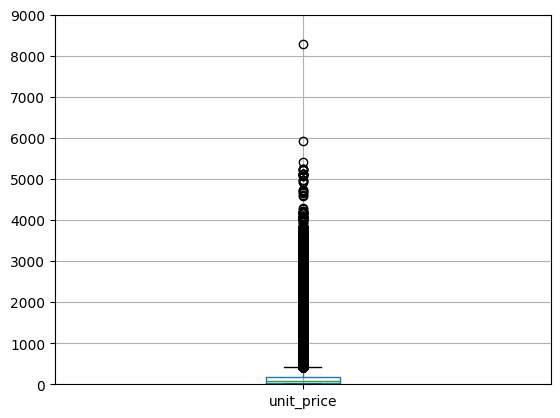

In [136]:
ax = master_df.boxplot('unit_price');
ax.set_ylim(0, +9000)
plt.show()


In [137]:
master_df = master_df.drop(columns='in_stock')
master_df


,order_id,state,product_quantity,sku,unit_price,date,total_price,name,type,short,long,category
0,241423,Completed,1,LAC0212,129.16,2017-11-06,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,11935397,LAC,LaCie,desktop components
1,242832,Completed,1,PAR0074,10.77,2017-12-31,10.77,Parrot 550mAh battery for MiniDrones,11905404,PAR,Parrot,Other
2,243330,Completed,1,OWC0074,77.99,2017-02-15,77.99,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1364,OWC,OWC,Other
3,245275,Completed,1,TAD0007,149.00,2017-06-28,149.00,Tado Smart Climate Control Intelligent AC,11905404,TAD,Tado,Other
4,245595,Completed,2,PAC1561,52.99,2017-01-21,105.98,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",11935397,PAC,Pack,desktop components
...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,Completed,1,APP0927,13.99,2018-03-14,13.99,EarPods Apple Headphones with Remote and Mic (...,5384,APP,Apple,Other
62037,527070,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components
62038,527074,Completed,2,APP0698,9.99,2018-03-14,19.98,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components
62039,527096,Completed,3,APP0698,9.99,2018-03-14,29.97,Apple Lightning Cable Connector to USB 1m Whit...,1230,APP,Apple,desktop components


In [138]:
new_order = ['order_id', 'date', 'sku', 'name', 'product_quantity', 'unit_price', 'total_price', 'state', 'category', 'long',  'short', 'type']

master_df = master_df[new_order]
master_df


,order_id,date,sku,name,product_quantity,unit_price,total_price,state,category,long,short,type
0,241423,2017-11-06,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,1,129.16,129.16,Completed,desktop components,LaCie,LAC,11935397
1,242832,2017-12-31,PAR0074,Parrot 550mAh battery for MiniDrones,1,10.77,10.77,Completed,Other,Parrot,PAR,11905404
2,243330,2017-02-15,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1,77.99,77.99,Completed,Other,OWC,OWC,1364
3,245275,2017-06-28,TAD0007,Tado Smart Climate Control Intelligent AC,1,149.00,149.00,Completed,Other,Tado,TAD,11905404
4,245595,2017-01-21,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2,52.99,105.98,Completed,desktop components,Pack,PAC,11935397
...,...,...,...,...,...,...,...,...,...,...,...,...
62036,527042,2018-03-14,APP0927,EarPods Apple Headphones with Remote and Mic (...,1,13.99,13.99,Completed,Other,Apple,APP,5384
62037,527070,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,9.99,19.98,Completed,desktop components,Apple,APP,1230
62038,527074,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,9.99,19.98,Completed,desktop components,Apple,APP,1230
62039,527096,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,3,9.99,29.97,Completed,desktop components,Apple,APP,1230


In [139]:
merged_df


,id,id_order,sku,name,unit_price,price,unit_price_dif,unit_price_dif_%
0,1119115,299544,APP1582,"Apple MacBook Air 13 ""i7 22 Ghz | 8GB RAM | 12...",1137.99,1219.00,81.01,-6.65
1,1119126,299549,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",2565.99,3209.00,643.01,-20.04
2,1119126,299549,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",2565.99,3209.00,643.01,-20.04
3,1119126,299549,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",2565.99,3209.00,643.01,-20.04
4,1119126,299549,PAC0929,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",2565.99,3209.00,643.01,-20.04
...,...,...,...,...,...,...,...,...
119476,1649999,452946,APP2075,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",2999.00,3305.59,306.59,-9.27
119477,1650045,527321,PAC2148,"Apple iMac 27 ""Core i7 Retina 5K 42Ghz | 64GB ...",3497.00,4519.00,1022.00,-22.62
119478,1650050,527324,PAC2117,"Apple iMac 27 ""Core i7 Retina 5K 42GHz | 16GB ...",3075.00,3319.00,244.00,-7.35
119479,1650088,527342,APP2492,Apple iPhone X 256GB Silver,1329.00,NaN,NaN,NaN


In [140]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119481 entries, 0 to 119480
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                119481 non-null  int64  
 1   id_order          119481 non-null  int64  
 2   sku               119481 non-null  object 
 3   name              119481 non-null  object 
 4   unit_price        119481 non-null  float64
 5   price             117662 non-null  float64
 6   unit_price_dif    117662 non-null  float64
 7   unit_price_dif_%  117662 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.3+ MB


## how many products are discounted

In [141]:
master_df.loc[:,'discounted'] = False


/tmp/ipython-input-3675343431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df.loc[:,'discounted'] = False


In [142]:
master_product = master_df.merge(
    products_clean,
    on = 'sku'

)


In [143]:
master_product = master_product.copy()
master_product["discounted"] = master_product["price"] > master_product["unit_price"]


In [144]:
master_product


,order_id,date,sku,name_x,product_quantity,unit_price,total_price,state,category,long,short,type_x,discounted,name_y,desc,price,in_stock,type_y
0,241423,2017-11-06,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,1,129.16,129.16,Completed,desktop components,LaCie,LAC,11935397,True,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,139.99,1,11935397
1,242832,2017-12-31,PAR0074,Parrot 550mAh battery for MiniDrones,1,10.77,10.77,Completed,Other,Parrot,PAR,11905404,True,Parrot 550mAh battery for MiniDrones,Parrot 550mAh battery for MiniDrones,17.99,0,11905404
2,243330,2017-02-15,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1,77.99,77.99,Completed,Other,OWC,OWC,1364,True,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,99.99,1,1364
3,245275,2017-06-28,TAD0007,Tado Smart Climate Control Intelligent AC,1,149.00,149.00,Completed,Other,Tado,TAD,11905404,True,Tado Smart Climate Control Intelligent AC,Tado Smart Climate Control Intelligent AC,179.00,0,11905404
4,245595,2017-01-21,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2,52.99,105.98,Completed,desktop components,Pack,PAC,11935397,True,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...","Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",103.95,1,11935397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60798,527042,2018-03-14,APP0927,EarPods Apple Headphones with Remote and Mic (...,1,13.99,13.99,Completed,Other,Apple,APP,5384,True,EarPods Apple Headphones with Remote and Mic (...,EarPods Apple Headphones with Remote and Mic (...,35.00,1,5384
60799,527070,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,9.99,19.98,Completed,desktop components,Apple,APP,1230,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1,1230
60800,527074,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,9.99,19.98,Completed,desktop components,Apple,APP,1230,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1,1230
60801,527096,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,3,9.99,29.97,Completed,desktop components,Apple,APP,1230,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1,1230


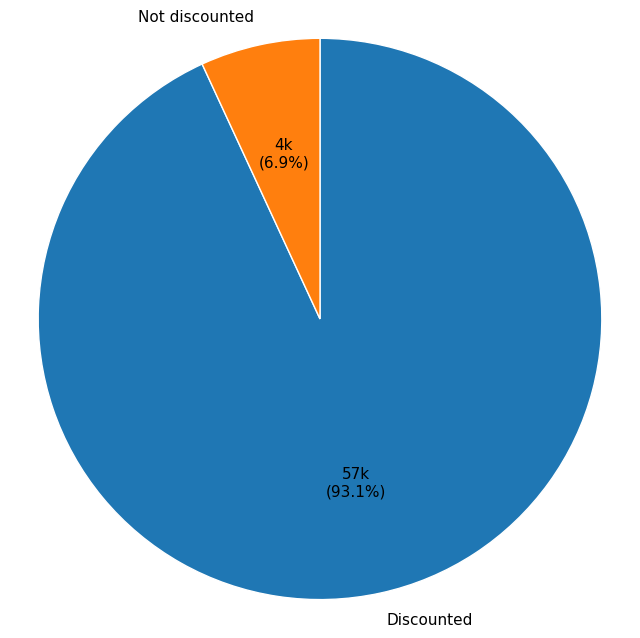

In [145]:
import matplotlib.pyplot as plt

# ===============================
# Data preparation (wie bei dir)
# ===============================
count_df = (
    master_product["discounted"]
        .value_counts()
        .rename_axis("discounted")
        .reset_index(name="count")
)

total = count_df["count"].sum()

count_df["label"] = count_df["discounted"].map({
    True: "Discounted",
    False: "Not discounted"
})

count_df["share_pct"] = count_df["count"] / total * 100

# Sort optional (für konsistente Reihenfolge)
count_df = count_df.sort_values("count", ascending=False)

# ===============================
# Pie chart
# ===============================
fig, ax = plt.subplots(figsize=(6.5, 6.5))

values = count_df["count"].to_list()
labels = count_df["label"].to_list()

def autopct_func(pct):
    absolute = int(round(pct/100 * total))
    return f"{absolute/1000:.0f}k\n({pct:.1f}%)"

ax.pie(
    values,
    labels=labels,
    autopct=autopct_func,
    startangle=90,
    counterclock=False,
    textprops={"fontsize": 11},
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

ax.set_title("")  # kein Titel
ax.axis("equal")  # Kreis statt Oval

plt.tight_layout()
plt.show()


In [146]:
order_master_product = master_product.merge(
    orders_clean,
    on='order_id'
)


In [147]:
order_master_product = order_master_product
order_master_product


,order_id,date,sku,name_x,product_quantity,unit_price,total_price,state_x,category,long,...,type_x,discounted,name_y,desc,price,in_stock,type_y,created_date,total_paid,state_y
0,241423,2017-11-06,LAC0212,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,1,129.16,129.16,Completed,desktop components,LaCie,...,11935397,True,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,139.99,1,11935397,2017-11-06,136.15,Completed
1,242832,2017-12-31,PAR0074,Parrot 550mAh battery for MiniDrones,1,10.77,10.77,Completed,Other,Parrot,...,11905404,True,Parrot 550mAh battery for MiniDrones,Parrot 550mAh battery for MiniDrones,17.99,0,11905404,2017-12-31,15.76,Completed
2,243330,2017-02-15,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,1,77.99,77.99,Completed,Other,OWC,...,1364,True,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,99.99,1,1364,2017-02-16,84.98,Completed
3,245275,2017-06-28,TAD0007,Tado Smart Climate Control Intelligent AC,1,149.00,149.00,Completed,Other,Tado,...,11905404,True,Tado Smart Climate Control Intelligent AC,Tado Smart Climate Control Intelligent AC,179.00,0,11905404,2017-06-28,149.00,Completed
4,245595,2017-01-21,PAC1561,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",2,52.99,105.98,Completed,desktop components,Pack,...,11935397,True,"Macally External Hard Drive 1TB 35 ""USB 3.0 SA...","Macally External Hard Drive 1TB 35 ""USB 3.0 SA...",103.95,1,11935397,2017-01-21,112.97,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60798,527042,2018-03-14,APP0927,EarPods Apple Headphones with Remote and Mic (...,1,13.99,13.99,Completed,Other,Apple,...,5384,True,EarPods Apple Headphones with Remote and Mic (...,EarPods Apple Headphones with Remote and Mic (...,35.00,1,5384,2018-03-14,18.98,Completed
60799,527070,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,9.99,19.98,Completed,desktop components,Apple,...,1230,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1,1230,2018-03-14,24.97,Completed
60800,527074,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2,9.99,19.98,Completed,desktop components,Apple,...,1230,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1,1230,2018-03-14,24.97,Completed
60801,527096,2018-03-14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,3,9.99,29.97,Completed,desktop components,Apple,...,1230,True,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1,1230,2018-03-14,34.96,Completed


In [148]:
order_master_product = order_master_product[['date', 'price', 'unit_price', 'category','discounted']]


In [149]:
test = order_master_product


In [150]:
test


,date,price,unit_price,category,discounted
0,2017-11-06,139.99,129.16,desktop components,True
1,2017-12-31,17.99,10.77,Other,True
2,2017-02-15,99.99,77.99,Other,True
3,2017-06-28,179.00,149.00,Other,True
4,2017-01-21,103.95,52.99,desktop components,True
...,...,...,...,...,...
60798,2018-03-14,35.00,13.99,Other,True
60799,2018-03-14,25.00,9.99,desktop components,True
60800,2018-03-14,25.00,9.99,desktop components,True
60801,2018-03-14,25.00,9.99,desktop components,True


/tmp/ipython-input-1692781326.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


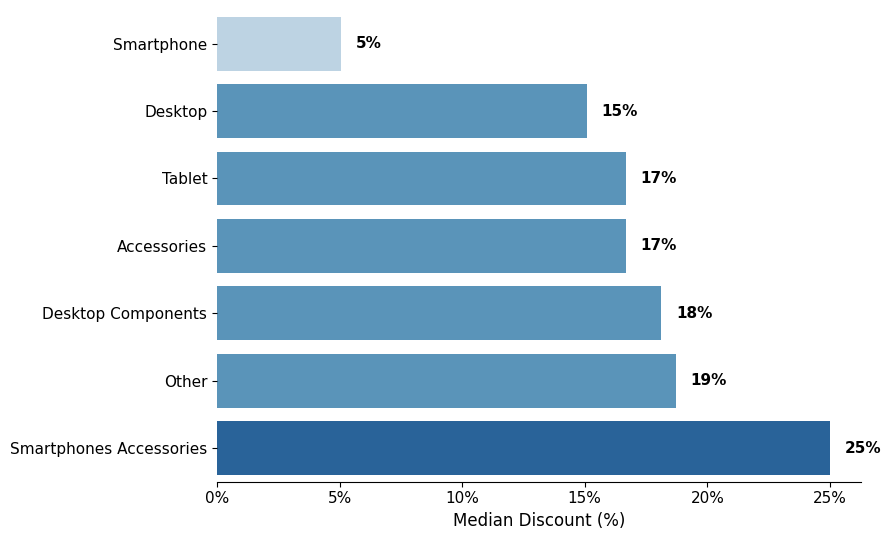

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify min / max
min_val = ceo_df["median_discount"].min()
max_val = ceo_df["median_discount"].max()

# Base color (corporate-safe blue)
base = sns.color_palette("Blues", 9)

light_color = base[2]   # clearly lighter
neutral_color = base[5]
dark_color = base[7]    # clearly darker

# Assign colors
colors = []
for v in ceo_df["median_discount"]:
    if v == min_val:
        colors.append(light_color)
    elif v == max_val:
        colors.append(dark_color)
    else:
        colors.append(neutral_color)

# Plot
fig, ax = plt.subplots(figsize=(9, 5.5))

sns.barplot(
    data=ceo_df,
    x="median_discount",
    y="category",
    palette=colors,
    ax=ax
)

# Axis
ax.set_xlabel("Median Discount (%)", fontsize=12)
ax.set_ylabel("")
ax.xaxis.set_major_formatter(lambda x, _: f"{int(x)}%")
ax.tick_params(axis="both", labelsize=11)

# Correct & safe value labels
offset = 0.6
for pos, row in enumerate(ceo_df.itertuples()):
    ax.text(
        row.median_discount + offset,
        pos,
        f"{row.median_discount:.0f}%",
        va="center",
        fontsize=11,
        fontweight="bold"
    )


sns.despine(left=True)
ax.grid(False)

plt.tight_layout()
plt.show()


In [152]:
master_product.to_csv(
    r'/content/drive/MyDrive/Group-Data-Cleaining/data/clean/orders_clean.csv',
    index=False
)
